### Importación de datos



In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [68]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


### Ingresos Totales por cada Tienda

In [69]:
# Uniendo los DataFrames en uno solo

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda["Tiendas"] = "Tienda 1"
tienda2["Tiendas"] = "Tienda 2"
tienda3["Tiendas"] = "Tienda 3"
tienda4["Tiendas"] = "Tienda 4"

todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True) # Uniendo las Tiendas en un solo DataFrame

todas_las_tiendas.shape # Verificando el total de filas y columnas

(9435, 13)

In [70]:
todas_las_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tiendas                 9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [71]:
todas_las_tiendas.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tiendas
504,Impresora,Electrónicos,236200.0,19800.0,08/01/2023,Pedro Gomez,Medellín,4,Tarjeta de débito,1,6.25184,-75.56359,Tienda 1
7912,Auriculares,Electrónicos,102600.0,5700.0,03/10/2021,Maria Alfonso,Bogotá,3,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 4
1417,Ciencia de datos con Python,Libros,47200.0,0.0,08/03/2022,Mariana Herrera,Bogotá,5,Tarjeta de crédito,5,4.60971,-74.08175,Tienda 1
9271,Pandereta,Instrumentos musicales,44500.0,2600.0,23/08/2021,Camila Rivera,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
4361,Cubertería,Artículos para el hogar,31100.0,0.0,12/08/2021,Juliana Costa,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 2


In [72]:
df_ingresos_totales = todas_las_tiendas.groupby("Tiendas")["Precio"].sum()\
                                       .reset_index(name="Promedio")
df_ingresos_totales



,Tiendas,Promedio
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15156\1108168132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


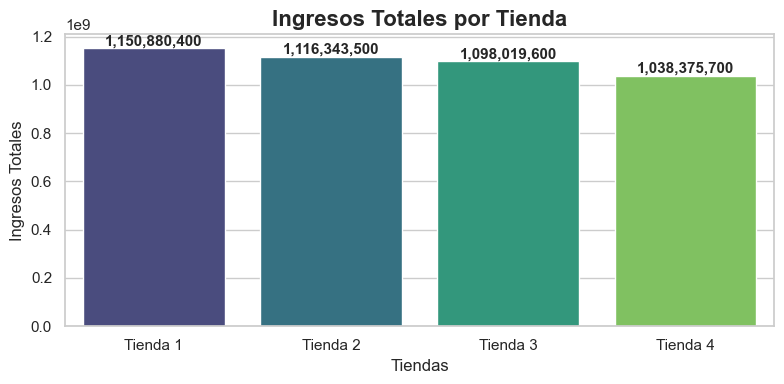

In [73]:
# Grafica Ingresos Totales

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
barplot = sns.barplot(
    data=df_ingresos_totales,
    x="Tiendas", 
    y="Promedio",
    palette="viridis"
)

# Personalizar el gráfico
plt.title("Ingresos Totales por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Ingresos Totales", fontsize=12)

# Añadir los valores encima de cada barra
for bar in barplot.patches:
    barplot.annotate(
        f'{bar.get_height():,.0f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom',
        fontsize=11, fontweight='bold'
    )

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show();

# 2. Ventas por categoría

Descripción

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [74]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tiendas
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1


In [75]:
tiendas_datos = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Diccionario para almacenar resultados
resultados = {}

for nombre, df in tiendas_datos.items():
    
    ventas = df['Categoría del Producto'].value_counts().reset_index()
    ventas.columns = ['Categoría del Producto', 'Cantidad de Ventas']
    ventas = ventas.sort_values('Cantidad de Ventas', ascending=False)
    resultados[nombre] = ventas

# Mostrar tablas
print("*** VENTAS POR CATEGORÍA EN CADA TIENDA ***\n")
for nombre, df_ventas in resultados.items():
    print(f"\n{nombre}:")
    print(df_ventas.to_string(index=False))
    

*** VENTAS POR CATEGORÍA EN CADA TIENDA ***


Tienda 1:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 465
           Electrónicos                 448
               Juguetes                 324
      Electrodomésticos                 312
   Deportes y diversión                 284
 Instrumentos musicales                 182
                 Libros                 173
Artículos para el hogar                 171

Tienda 2:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 442
           Electrónicos                 422
               Juguetes                 313
      Electrodomésticos                 305
   Deportes y diversión                 275
 Instrumentos musicales                 224
                 Libros                 197
Artículos para el hogar                 181

Tienda 3:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 499
           Electrónicos                 45

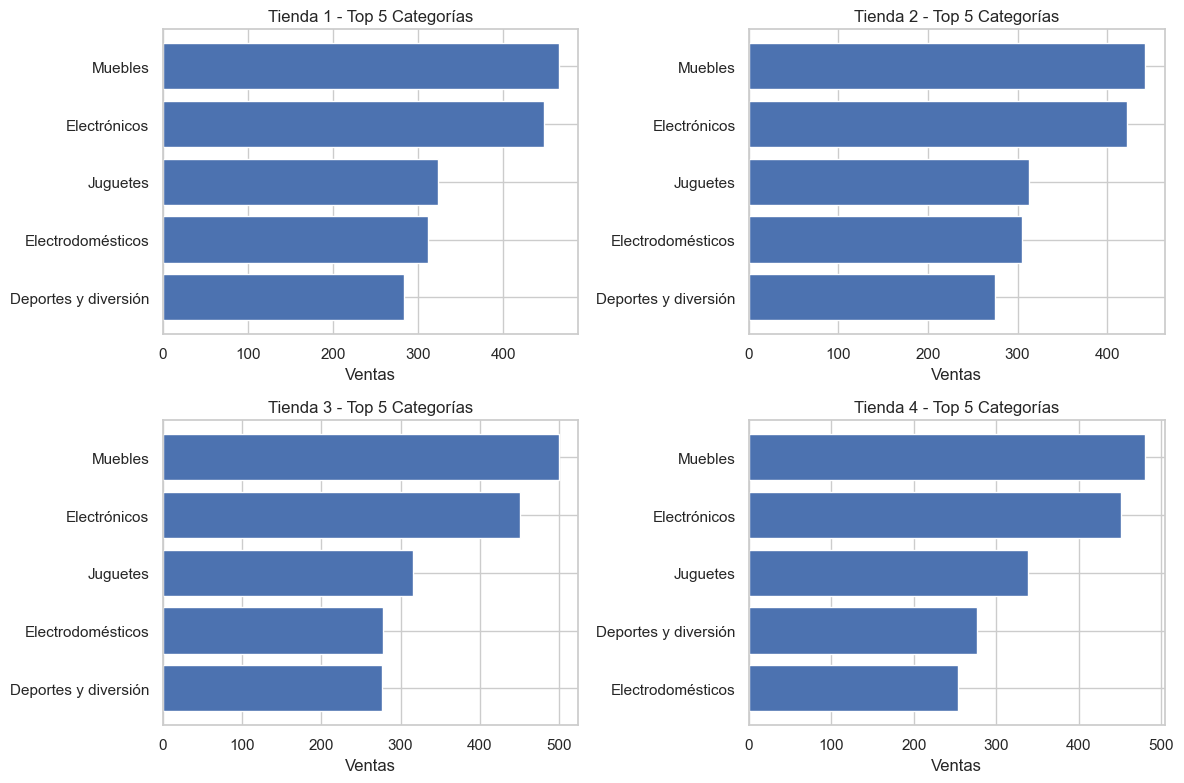

In [76]:
# Visualización 1: Barras horizontales
plt.figure(figsize=(12, 8))

for idx, (nombre, df_ventas) in enumerate(resultados.items(), 1):
    plt.subplot(2, 2, idx)
    
    # Tomar las 5 categorías principales
    top_5 = df_ventas.head(5)
    
    plt.barh(top_5['Categoría del Producto'], top_5['Cantidad de Ventas'])
    plt.title(f'{nombre} - Top 5 Categorías')
    plt.xlabel('Ventas')
    
    # Invertir eje Y para que la mayor esté arriba
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Descripción

En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [77]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tiendas
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1


In [78]:
tienda_datos = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resultado_promedios = {}

for nombre_tienda, df in tienda_datos.items():
    # Calculamos el promedio y lo convertimos en un DataFrame
    promedio = df["Calificación"].mean().round(2)
    # Creamos un DataFrame con una fila y una columna
    calificaciones_df = pd.DataFrame({"Calificación": [promedio]})
    resultado_promedios[nombre_tienda] = calificaciones_df
    
print("***Calificaion de los clientes por Tienda***")

for nombre, df_calificacion in resultado_promedios.items():
    print(f'\n{nombre}:')
    print(df_calificacion.to_string(index=False)) 

***Calificaion de los clientes por Tienda***

Tienda 1:
 Calificación
         3.98

Tienda 2:
 Calificación
         4.04

Tienda 3:
 Calificación
         4.05

Tienda 4:
 Calificación
          4.0


# 4. Productos más y menos vendidos

Descripción

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [79]:
def analizar_tienda_top_bottom(nombre, datos, n=1):
    conteo = datos['Producto'].value_counts()
    
    print(f"{nombre}:")
    
    # Top n productos
    top_n = conteo.head(n)
    print(f"Top {n} productos más vendidos:")
    for i, (producto, ventas) in enumerate(top_n.items(), 1):
        print(f"  {i}. {producto}: {ventas} ventas")
    
    # Bottom n productos
    bottom_n = conteo.tail(n)
    print(f"\nTop {n} productos menos vendidos:")
    for i, (producto, ventas) in enumerate(bottom_n.items(), 1):
        print(f"  {i}. {producto}: {ventas} ventas")
    
    print()

# Analizar cada tienda con top 3 y bottom 3
analizar_tienda_top_bottom("Tienda 1", tienda, 3)
analizar_tienda_top_bottom("Tienda 2", tienda2, 3)
analizar_tienda_top_bottom("Tienda 3", tienda3, 3)
analizar_tienda_top_bottom("Tienda 4", tienda4, 3)

Tienda 1:
Top 3 productos más vendidos:
  1. TV LED UHD 4K: 60 ventas
  2. Armario: 60 ventas
  3. Microondas: 60 ventas

Top 3 productos menos vendidos:
  1. Olla de presión: 35 ventas
  2. Auriculares con micrófono: 33 ventas
  3. Celular ABXY: 33 ventas

Tienda 2:
Top 3 productos más vendidos:
  1. Iniciando en programación: 65 ventas
  2. Microondas: 62 ventas
  3. Batería: 61 ventas

Top 3 productos menos vendidos:
  1. Mesa de comedor: 34 ventas
  2. Impresora: 34 ventas
  3. Juego de mesa: 32 ventas

Tienda 3:
Top 3 productos más vendidos:
  1. Kit de bancas: 57 ventas
  2. Cama king: 56 ventas
  3. Mesa de comedor: 56 ventas

Top 3 productos menos vendidos:
  1. Microondas: 36 ventas
  2. Set de vasos: 36 ventas
  3. Bloques de construcción: 35 ventas

Tienda 4:
Top 3 productos más vendidos:
  1. Cama box: 62 ventas
  2. Cubertería: 59 ventas
  3. Dashboards con Power BI: 56 ventas

Top 3 productos menos vendidos:
  1. Guitarra acústica: 37 ventas
  2. Armario: 34 ventas
  3. G

# 5. Envío promedio por tienda

Descripción

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [80]:
# Verificando el total de filas de los DataFrames

print(tienda.shape)
print(tienda2.shape)
print(tienda3.shape)
print(tienda4.shape)

(2359, 13)
(2359, 13)
(2359, 13)
(2358, 13)


In [81]:
# Uniendo los DataFrames en uno solo

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda["Tiendas"] = "Tienda 1"
tienda2["Tiendas"] = "Tienda 2"
tienda3["Tiendas"] = "Tienda 3"
tienda4["Tiendas"] = "Tienda 4"

todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True) # Uniendo las Tiendas en un solo DataFrame

todas_las_tiendas.shape # Verificando el total de filas y columnas



(9435, 13)

In [82]:
df = todas_las_tiendas.groupby("Tiendas")["Costo de envío"].mean().round(2)\
                      .reset_index(name="Promedio de Envio")
                      
df

,Tiendas,Promedio de Envio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


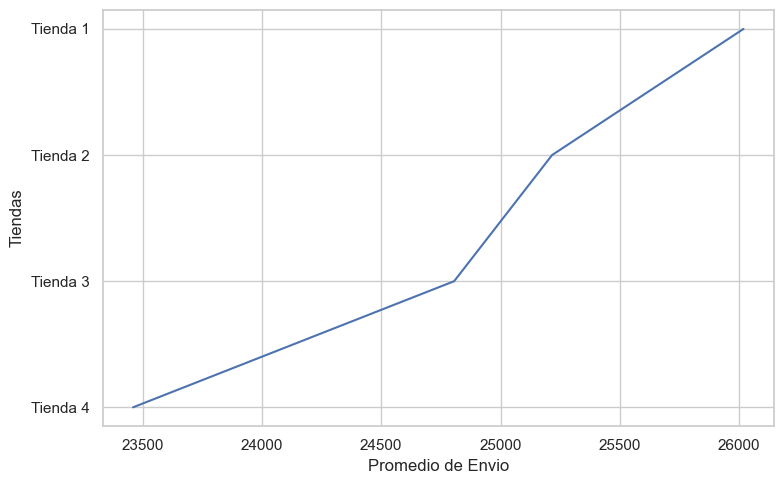

In [83]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=df, x="Promedio de Envio", y="Tiendas", ax=ax);
ax.grid(True)

# Sugerido antes de exportar la grafica
plt.tight_layout()

# Exportar grafico
#fig.savefig("Nombre del archivo.png", dpi=300);

In [84]:
# KPIs calculados
todas_las_tiendas["Cantidad"] = 1

metricas = {
    # Ventas Basicas
    'ventas_totales': todas_las_tiendas.groupby('Tiendas')['Precio'].sum(),
    'numero_transacciones': todas_las_tiendas.groupby('Tiendas').size(),
    
    # Metricas de Precio
    'precio_promedio': todas_las_tiendas.groupby('Tiendas')['Precio'].mean().round(),
    'precio_mediano': todas_las_tiendas.groupby('Tiendas')['Precio'].median(),
    'precio_maximo': todas_las_tiendas.groupby('Tiendas')['Precio'].max(),
    'precio_minimo': todas_las_tiendas.groupby('Tiendas')['Precio'].min(),
    
    # Logistica
    'costo_envio_total': todas_las_tiendas.groupby('Tiendas')['Costo de envío'].sum(),
    'costo_envio_promedio': todas_las_tiendas.groupby('Tiendas')['Costo de envío'].mean().round(),
    
    # Metodo de pago     
    'metodo_pago_preferido': todas_las_tiendas.groupby('Tiendas')['Método de pago'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Datos'),
    
    # Producto Preferido
    'categoria_preferida': todas_las_tiendas.groupby('Tiendas')['Categoría del Producto'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Datos'),
    
    # Categoria mas Vendida
    'producto_top': todas_las_tiendas.groupby('Tiendas')['Producto'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Sin datos'),
    
    # Calificacion Promedio
    'calificacion_promedio': todas_las_tiendas.groupby('Tiendas')['Calificación'].mean().round(2)
    
}

df_kapis = pd.DataFrame(metricas)
df_kapis

,ventas_totales,numero_transacciones,precio_promedio,precio_mediano,precio_maximo,precio_minimo,costo_envio_total,costo_envio_promedio,metodo_pago_preferido,categoria_preferida,producto_top,calificacion_promedio
Tiendas,,,,,,,,,,,,
Tienda 1,1.150880e+09,2359,487868.0,235300.0,2977000.0,7600.0,61377900.0,26019.0,Tarjeta de crédito,Muebles,Armario,3.98
Tienda 2,1.116344e+09,2359,473227.0,218200.0,2953400.0,7600.0,59485100.0,25216.0,Tarjeta de crédito,Muebles,Iniciando en programación,4.04
Tienda 3,1.098020e+09,2359,465460.0,226300.0,2968200.0,7600.0,58516600.0,24806.0,Tarjeta de crédito,Muebles,Kit de bancas,4.05
Tienda 4,1.038376e+09,2358,440363.0,209450.0,2902200.0,7600.0,55317400.0,23459.0,Tarjeta de crédito,Muebles,Cama box,4.00


In [86]:
# Version de instalacion 
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import IPython

print("="*50)
print("📊 VERSIONES INSTALADAS")
print("="*50)

print(f"✅ Python: {sys.version}")
print(f"✅ Pandas: {pd.__version__}")
print(f"✅ Matplotlib: {matplotlib.__version__}") 
print(f"✅ NumPy: {np.__version__}")
print(f"✅ Seaborn: {sns.__version__}")
print(f"✅ IPython (Jupyter): {IPython.__version__}")

# Verificar si estamos en Colab
try:
    print(f"✅ Google Colab: Disponible")
    print(f"   Entorno: Colab")
except:
    print(f"✅ Entorno: Jupyter/Local")

print("="*50)

📊 VERSIONES INSTALADAS
✅ Python: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
✅ Pandas: 2.3.3
✅ Matplotlib: 3.10.3
✅ NumPy: 1.26.4
✅ Seaborn: 0.13.2
✅ IPython (Jupyter): 9.2.0
✅ Google Colab: Disponible
   Entorno: Colab
